# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [2]:
# import numpy and pandas
import pandas as pd
import numpy as np
from scipy.stats import trim_mean, mode, skew, gaussian_kde, pearsonr, spearmanr, beta
from statsmodels.stats.weightstats import ztest as ztest

from scipy.stats import ttest_ind, norm, t
from scipy.stats import f_oneway
from scipy.stats import sem
from scipy.stats import ttest_1samp
import matplotlib.pyplot as plt

# Challenge 1 - Exploring the Data

In this challenge, we will examine all salaries of employees of the City of Chicago. We will start by loading the dataset and examining its contents

In [3]:
# Run this code:
salaries = pd.read_csv('../data/Current_Employee_Names__Salaries__and_Position_Titles.csv')

Examine the `salaries` dataset using the `head` function below.

In [4]:
salaries.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122.0,NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,101592.0,NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,110064.0,NaN
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,19.86


# Challenge 2 - Hypothesis Tests

In this section of the lab, we will test whether the hourly wage of all hourly workers is significantly different from $30/hr. Import the correct one sample test function from scipy and perform the hypothesis test for a 95% two sided confidence interval.

In [5]:
hourly_salaries = salaries[salaries['Salary or Hourly'] == 'Hourly']
hour = hourly_salaries['Hourly Rate'].mean()
hour

32.78855771628024

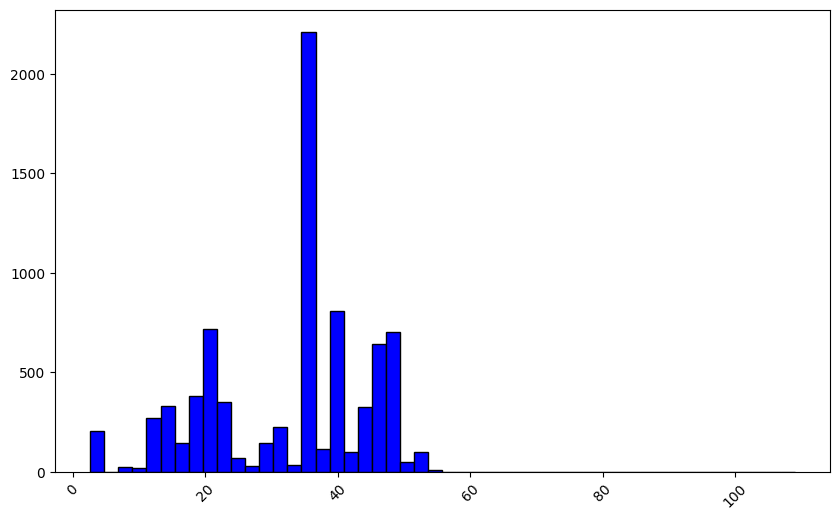

In [6]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(hourly_salaries['Hourly Rate'], bins = 50, color='blue', edgecolor='black')

# Adding titles and labels
plt.title('')
plt.xlabel('')
plt.ylabel('')

# Display the plot
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary for better readability
plt.show()

In [7]:
alpha = 0.05
# null hypothesis : mean = 30$ per hour
t_statistic, p_value = ttest_1samp(hourly_salaries['Hourly Rate'], 30.00, nan_policy='omit')

print(p_value)
print(t_statistic)

if p_value < alpha:
    print("Reject the null hypothesis: The sample mean is significantly different from 30.")
else:
    print("Fail to reject the null hypothesis: The sample mean is not significantly different from 30.")

4.3230240486229894e-92
20.6198057854942
Reject the null hypothesis: The sample mean is significantly different from 30.


# Challenge 3 - Constructing Confidence Intervals

While testing our hypothesis is a great way to gather empirical evidence for accepting or rejecting the hypothesis, another way to gather evidence is by creating a confidence interval. A confidence interval gives us information about the true mean of the population. So for a 95% confidence interval, we are 95% sure that the mean of the population is within the confidence interval. 
).

To read more about confidence intervals, click [here](https://en.wikipedia.org/wiki/Confidence_interval).


In the cell below, we will construct a 95% confidence interval for the mean hourly wage of all hourly workers. 

The confidence interval is computed in SciPy using the `t.interval` function. You can read more about this function [here](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html).

To compute the confidence interval of the hourly wage, use the 0.95 for the confidence level, number of rows - 1 for degrees of freedom, the mean of the sample for the location parameter and the standard error for the scale. The standard error can be computed using [this](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html) function in SciPy.

In [10]:
from scipy import stats

# Confidence level
confidence_level = 0.95

# Number of samples
n = len(hourly_salaries['Hourly Rate'])

# Mean and standard error of the mean (SEM)
mean = np.mean(hourly_salaries['Hourly Rate'])
semean = stats.sem(hourly_salaries['Hourly Rate'])

# Degrees of freedom
df_ = n - 1

t.interval(confidence_level, df_, loc = mean, scale = semean)

(32.52345834488425, 33.05365708767623)

# Challenge 4 - Hypothesis Tests of Proportions

Another type of one sample test is a hypothesis test of proportions. In this test, we examine whether the proportion of a group in our sample is significantly different than a fraction. 

You can read more about one sample proportion tests [here](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/SAS/SAS6-CategoricalData/SAS6-CategoricalData2.html).

In the cell below, use the `proportions_ztest` function from `statsmodels` to perform a hypothesis test that will determine whether the number of hourly workers in the City of Chicago is significantly different from 25% at the 95% confidence level.

In [9]:
from statsmodels.stats.proportion import proportions_ztest

# Calculate sample proportion
samp_prop = len(hourly_salaries['Hourly Rate']) / len(salaries['Salary or Hourly'])

# Count of workers working hourly
count = len(hourly_salaries['Hourly Rate'])

# Count of the total amount of workers wheter hourly or salary
nobs = len(salaries['Salary or Hourly'])

# Hypothesized proportion
p0 = 0.25

# Perform the proportion z test
stat, p_value = proportions_ztest(count, nobs, value = p0)

print(f"Test Statistic: {stat}")
print(f"P-Value: {p_value}")

# Determine if we reject the null hypothesis at the 95% confidence level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The proportion of hourly workers is significantly different from 25%.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to suggest the proportion of hourly workers is significantly different from 25%.")


Test Statistic: -3.5099964213703005
P-Value: 0.0004481127249057967
Reject the null hypothesis: The proportion of hourly workers is significantly different from 25%.
